In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import requests

import pandas as pd
import random
import numpy as np

covid_path = os.path.join('/content','drive','My Drive','covid')


In [3]:
rilevazioni = pd.read_csv('/content/drive/My Drive/IT/Python/covid/rilevazioni.csv').set_index(['Regione','Citta'])
rilevazioni.iloc[:,15:]

23-03  24-03  25-03  ...  30-03  31-03  01-04
Regione   Citta                                 ...                     
LOMBARDIA BERGAMO           6471   6728   7072  ...   8664   8803   9039
          BRESCIA           5905   6298   6597  ...   8213   8367   8598
          COMO               581    635    706  ...   1061   1101   1157
          CREMONA           2925   3061   3156  ...   3788   3869   3941
          LECCO              934   1015   1076  ...   1437   1470   1516
...                          ...    ...    ...  ...    ...    ...    ...
CALABRIA  COSENZA             68     84     99  ...    184    186    188
          REGGIO CALABRIA     94     97    105  ...    190    195    201
          CATANZARO           46     49     51  ...    134    139    140
          VIBO VALENTIA       20     21     23  ...     44     44     44
          CROTONE             62     66     71  ...     93     93     94

[108 rows x 10 columns]

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

def plot_annotate(df, title='', xdelta=0, ydelta=10, figsize=(15, 7)):
  
  ax = df.T.plot(figsize=figsize, title=title)
  ax.set_xticks(ticks=np.arange(0, len(df.columns), step=1))
  ax.set_xticklabels(list(df.columns))

  for k, v in zip(np.arange(len(df.columns)), df.T.iterrows()):
    for el in v[1]:
      ax.annotate(el, (k + xdelta, el + ydelta))
  return ax

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sorted_by_infections = rilevazioni.loc[rilevazioni.sort_values(by=[rilevazioni.columns[-1]],ascending=False).index]

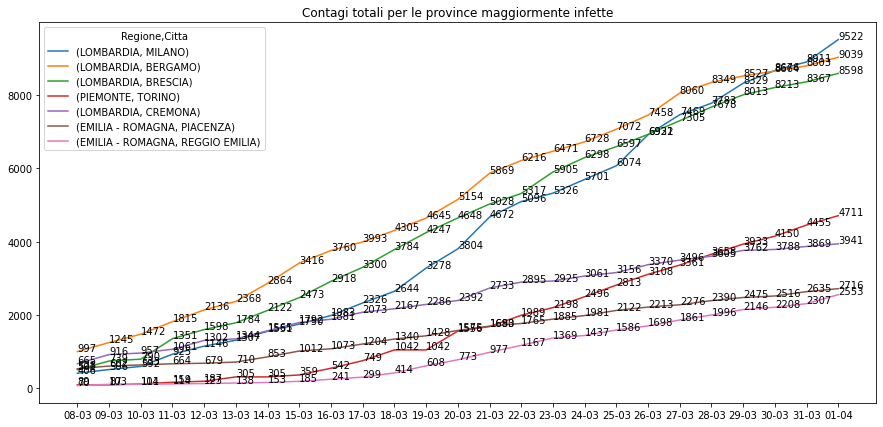

In [6]:
_ = plot_annotate(sorted_by_infections.head(7),'Contagi totali per le province maggiormente infette')

In [0]:
crescita = pd.DataFrame(index=sorted_by_infections.index)

In [0]:
for ieri, oggi in zip(sorted_by_infections.columns[:-1], sorted_by_infections.columns[1:]):
  crescita[oggi] = sorted_by_infections[oggi] - sorted_by_infections[ieri]

In [9]:
display(crescita.head(3))
sorted_by_infections.head(3)

09-03  10-03  11-03  12-03  ...  29-03  30-03  31-03  01-04
Regione   Citta                                ...                            
LOMBARDIA MILANO     100     86    333    221  ...    546    347    235    611
          BERGAMO    248    227    343    321  ...    178    137    139    236
          BRESCIA    238     51    561    247  ...    335    200    154    231

[3 rows x 24 columns]

08-03  09-03  10-03  11-03  ...  29-03  30-03  31-03  01-04
Regione   Citta                                ...                            
LOMBARDIA MILANO     406    506    592    925  ...   8329   8676   8911   9522
          BERGAMO    997   1245   1472   1815  ...   8527   8664   8803   9039
          BRESCIA    501    739    790   1351  ...   8013   8213   8367   8598

[3 rows x 25 columns]

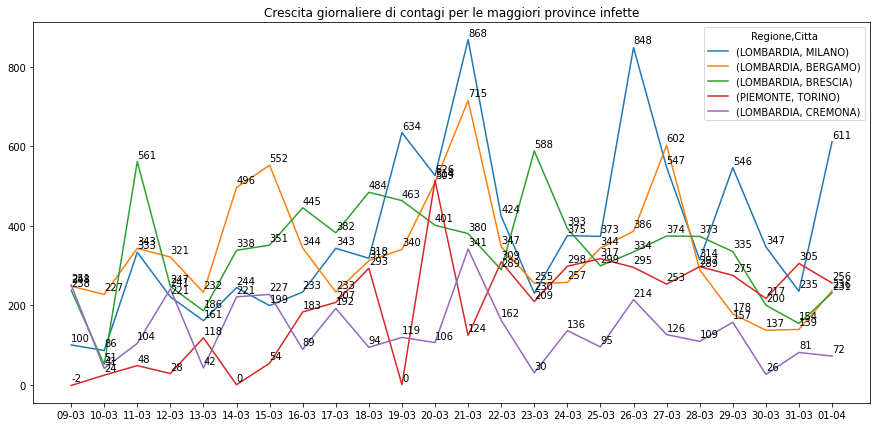

In [10]:
_ = plot_annotate(crescita.head(5), 'Crescita giornaliere di contagi per le maggiori province infette')

In [0]:
#display(crescita.loc[('EMILIA - ROMAGNA','PARMA'),:])
#sortedd_by_infections.loc(('EMILIA - ROMAGNA','PARMA'))

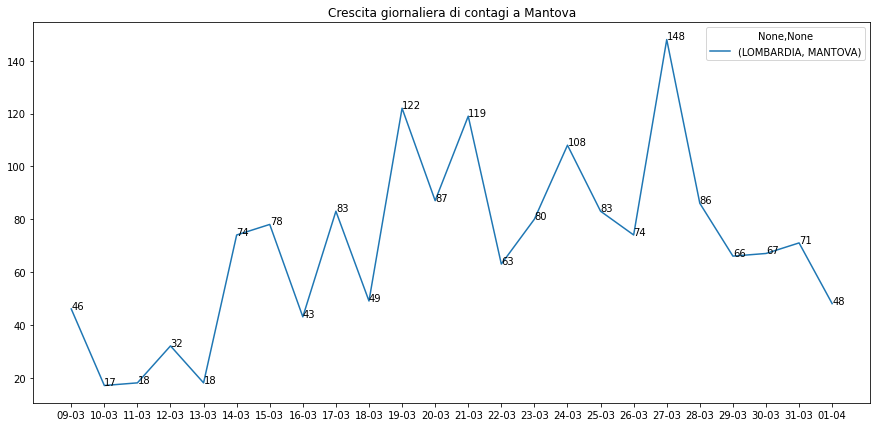

In [12]:
_ = plot_annotate(crescita.loc[('LOMBARDIA','MANTOVA')].to_frame().T, 'Crescita giornaliera di contagi a Mantova', ydelta=0)

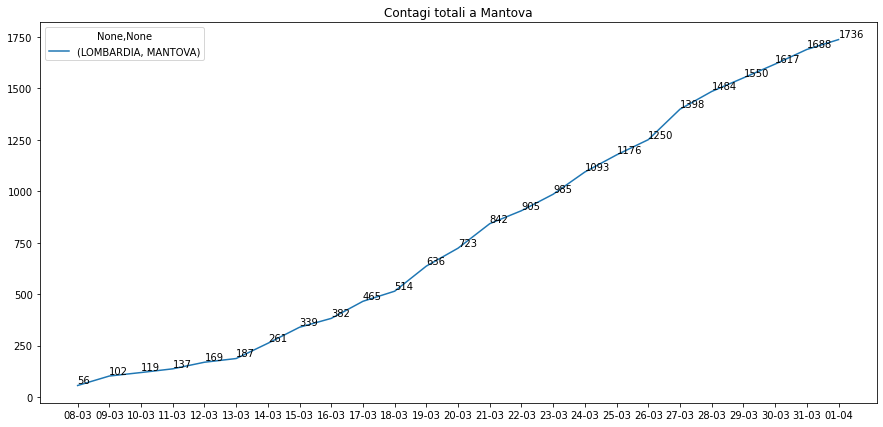

In [13]:
_ = plot_annotate(sorted_by_infections.loc[('LOMBARDIA','MANTOVA')].to_frame().T, 'Contagi totali a Mantova')

# Average 3 days

In [0]:
avg3 = pd.DataFrame(index=sorted_by_infections.index)
for meno2,ieri, oggi in zip(crescita.columns[:-2], crescita.columns[1:-1], crescita.columns[2:]):
  avg3[oggi] = pd.concat([crescita[oggi], crescita[ieri], crescita[meno2]], axis=1).mean(axis=1)

In [0]:
avg3 = avg3.astype('int32')

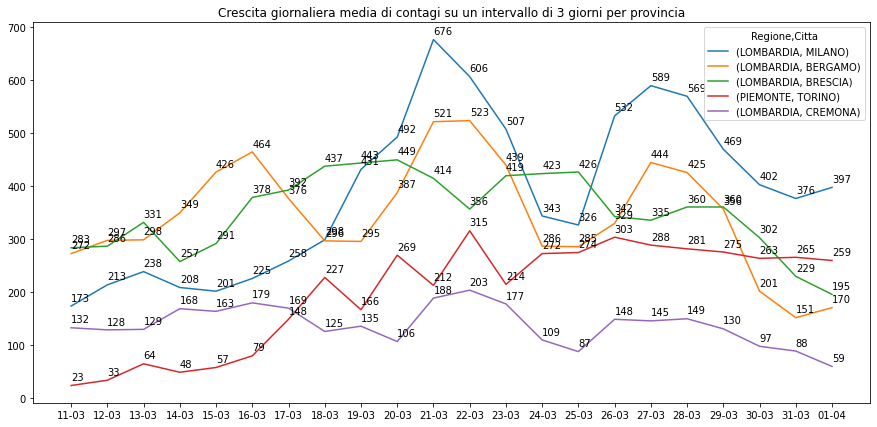

In [16]:
_ = plot_annotate(avg3.head(5), 'Crescita giornaliera media di contagi su un intervallo di 3 giorni per provincia')

In [0]:
casi_italia = sorted_by_infections.sum(axis=0).to_frame().T
casi_italia.index= ['Italia']

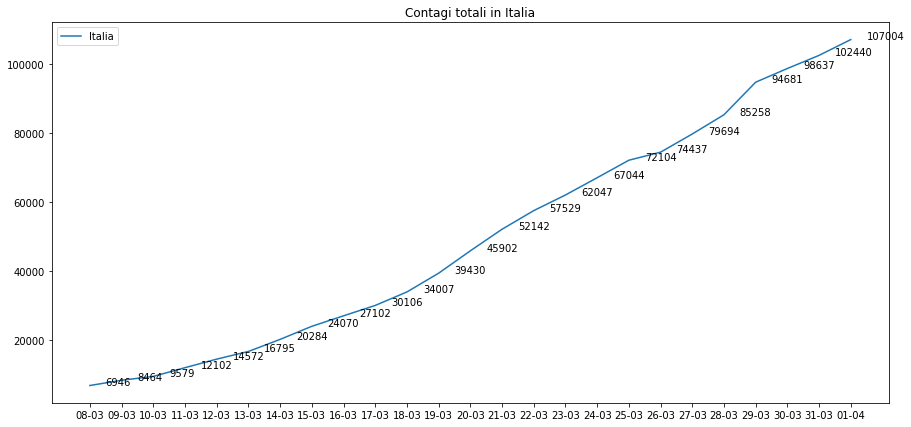

In [18]:
_ = plot_annotate(casi_italia, 'Contagi totali in Italia', xdelta=0.5)

In [0]:
crescita_italia = crescita.sum().to_frame().T
crescita_italia.index = ['Italia']

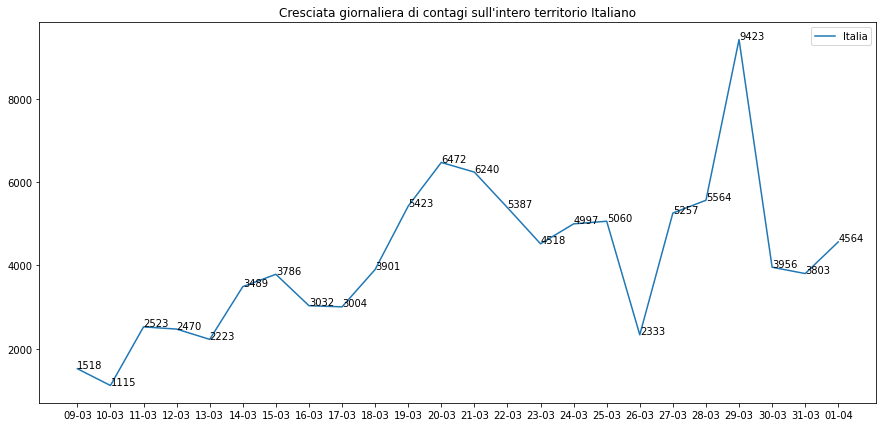

In [20]:
_ = plot_annotate(crescita_italia, 'Cresciata giornaliera di contagi sull\'intero territorio Italiano')